# Challenge: Model Comparison

In [47]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
import statsmodels.formula.api as smf

In [2]:
kickstarter_data = pd.read_csv('kickstarter_2018.csv')

In [3]:
kickstarter_data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000,2015-08-11 12:12:28,0.000,failed,0,GB,0.000,0.000,1533.950
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2017-09-02 04:43:57,2421.000,failed,15,US,100.000,2421.000,30000.000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.000,2013-01-12 00:20:50,220.000,failed,3,US,220.000,220.000,45000.000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.000,2012-03-17 03:24:11,1.000,failed,1,US,1.000,1.000,5000.000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.000,2015-07-04 08:35:03,1283.000,canceled,14,US,1283.000,1283.000,19500.000


In [4]:
kickstarter_data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.000,378661.000,378661.000,378661.000,374864.000,378661.000,378661.000
mean,1074731191.989,49080.792,9682.979,105.617,7036.729,9058.924,45454.401
std,619086204.323,1183391.259,95636.010,907.185,78639.745,90973.343,1152950.055
min,5971.000,0.010,0.000,0.000,0.000,0.000,0.010
25%,538263516.000,2000.000,30.000,2.000,16.980,31.000,2000.000
50%,1075275634.000,5200.000,620.000,12.000,394.720,624.330,5500.000
75%,1610148624.000,16000.000,4076.000,56.000,3034.090,4050.000,15500.000
max,2147476221.000,100000000.000,20338986.270,219382.000,20338986.270,20338986.270,166361390.710


In [5]:
kickstarter_data['state'] = kickstarter_data['state'].apply(lambda x: 1 if x == 'successful' else 0 )

In [6]:
kickstarter_data.describe()

,ID,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.000,378661.000,378661.000,378661.000,378661.000,374864.000,378661.000,378661.000
mean,1074731191.989,49080.792,9682.979,0.354,105.617,7036.729,9058.924,45454.401
std,619086204.323,1183391.259,95636.010,0.478,907.185,78639.745,90973.343,1152950.055
min,5971.000,0.010,0.000,0.000,0.000,0.000,0.000,0.010
25%,538263516.000,2000.000,30.000,0.000,2.000,16.980,31.000,2000.000
50%,1075275634.000,5200.000,620.000,0.000,12.000,394.720,624.330,5500.000
75%,1610148624.000,16000.000,4076.000,1.000,56.000,3034.090,4050.000,15500.000
max,2147476221.000,100000000.000,20338986.270,1.000,219382.000,20338986.270,20338986.270,166361390.710


My goal is to get an estimate of what a kickstarter's pledges are based on the goal, the number of backers and whether the kickstarter was succesful.

## KNN Model

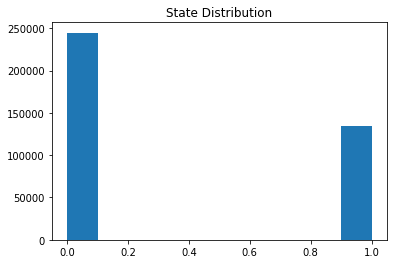

In [21]:
# This graph shows that our data shows nearly double the unsuccessful kickstarter campaigns as there is successful ones. 
plt.hist(kickstarter_data['state'])
plt.title('State Distribution');

In [37]:
X = kickstarter_data[["goal", "state", 'backers']]
y = kickstarter_data['pledged']
knn = neighbors.KNeighborsRegressor(n_neighbors=20)
knn.fit(X, y)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=20, weights='distance')
knn_w.fit(X, y)
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.42 (+/- 0.18)
Weighted Accuracy: 0.41 (+/- 0.17)


In [38]:
X = kickstarter_data[["goal", "state", 'backers']]
y = kickstarter_data['pledged']
knn = neighbors.KNeighborsRegressor(n_neighbors=15)
knn.fit(X, y)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=15, weights='distance')
knn_w.fit(X, y)
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.44 (+/- 0.17)
Weighted Accuracy: 0.43 (+/- 0.18)


In [33]:
X = kickstarter_data[["goal", "state", 'backers']]
y = kickstarter_data['pledged']
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X, y)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_w.fit(X, y)
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.47 (+/- 0.16)
Weighted Accuracy: 0.44 (+/- 0.20)


In [35]:
X = kickstarter_data[["goal", "state", 'backers']]
y = kickstarter_data['pledged']
knn = neighbors.KNeighborsRegressor(n_neighbors=8)
knn.fit(X, y)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=8, weights='distance')
knn_w.fit(X, y)
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.48 (+/- 0.15)
Weighted Accuracy: 0.44 (+/- 0.22)


In [36]:
X = kickstarter_data[["goal", "state", 'backers']]
y = kickstarter_data['pledged']
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
knn.fit(X, y)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=6, weights='distance')
knn_w.fit(X, y)
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.48 (+/- 0.13)
Weighted Accuracy: 0.43 (+/- 0.24)


In [34]:
X = kickstarter_data[["goal", "state", 'backers']]
y = kickstarter_data['pledged']
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
knn.fit(X, y)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_w.fit(X, y)
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.47 (+/- 0.12)
Weighted Accuracy: 0.41 (+/- 0.24)


In [39]:
X = kickstarter_data[["goal", "state", 'backers']]
y = kickstarter_data['pledged']
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
knn.fit(X, y)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=3, weights='distance')
knn_w.fit(X, y)
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.47 (+/- 0.08)
Weighted Accuracy: 0.40 (+/- 0.24)


In [40]:
X = kickstarter_data[["goal", "state", 'backers']]
y = kickstarter_data['pledged']
knn = neighbors.KNeighborsRegressor(n_neighbors=2)
knn.fit(X, y)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=2, weights='distance')
knn_w.fit(X, y)
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.43 (+/- 0.11)
Weighted Accuracy: 0.35 (+/- 0.24)


In [41]:
X = kickstarter_data[["goal", "state", 'backers']]
y = kickstarter_data['pledged']
knn = neighbors.KNeighborsRegressor(n_neighbors=1)
knn.fit(X, y)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=1, weights='distance')
knn_w.fit(X, y)
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.17 (+/- 0.39)
Weighted Accuracy: 0.17 (+/- 0.39)


Based on the results shown unweighted with 6 Ks had the best results of 48% accuracy

Linear Regression

In [43]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, y))


Coefficients: 
 [  4.01099179e-04   3.88025040e+03   7.53288247e+01]

Intercept: 
 334.566306772

R-squared:
0.514592910975


In [48]:
linear_formula = 'kickstarter_data.pledged ~ goal + state + backers'
lm = smf.ols(formula= linear_formula, data=kickstarter_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     kickstarter_data.pledged   R-squared:                       0.515
Model:                                  OLS   Adj. R-squared:                  0.515
Method:                       Least Squares   F-statistic:                 1.338e+05
Date:                      Mon, 04 Jun 2018   Prob (F-statistic):               0.00
Time:                              16:38:35   Log-Likelihood:            -4.7431e+06
No. Observations:                    378661   AIC:                         9.486e+06
Df Residuals:                        378657   BIC:                         9.486e+06
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    334.5663    134.869      2.481      0.013      70.228     598.905
goal           0.0004   9.15e-05      4.382      0.000       0.000       0.001
state       3880.2504    228.447     16.985      0.000    3432.501    4328.000
backers       75.3288      0.120    625.812      0.000      75.093      75.565
==============================================================================
Omnibus:                  1320684.513   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    2116617159425.559
Skew:                          66.606   Prob(JB):                         0.00
Kurtosis:                   11584.712   Cond. No.                     2.68e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
score = cross_val_score(regr, X, y, cv=10)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: 0.52 (+/- 0.13)


This model shows .515 rsquared compared with a 52% accuracy versus Knn which had its best accuracy at 48%